In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from tqdm import tqdm

In [17]:
#pip install opencv-python

In [44]:
class_names = ['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant']
class_labels ={'diseased cotton leaf':0,'diseased cotton plant':1,'fresh cotton leaf':2,'fresh cotton plant':3}
img_size = (150,150)

In [45]:
paths = ['C:/Users/win10/Desktop/CNN/Cotton Disease/train','C:/Users/win10/Desktop/CNN/Cotton Disease/test']


In [46]:
os.listdir('C:/Users/win10/Desktop/CNN/Cotton Disease/train')

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [47]:
os.listdir(os.path.join(paths[0],'diseased cotton leaf'))[:5]

['dis_leaf (1)_iaip.jpg',
 'dis_leaf (10)_iaip.jpg',
 'dis_leaf (101)_iaip.jpg',
 'dis_leaf (102)_iaip.jpg',
 'dis_leaf (103)_iaip.jpg']

In [48]:
def load_data(paths):
    output = []
    
    ## iterate thru test and train
    for path in paths:
        
        images = []
        labels = []
        print('Loading Started for',path)
        
        #iterate thru each folder 
        for folder in os.listdir(path):
            label = class_labels[folder]
            
            # iterate thru each image
            
            for file in tqdm(os.listdir(os.path.join(path,folder))):
            
                # path of the file
                img_path = os.path.join(os.path.join(path,folder),file)
                # open and resize the image
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image = cv2.resize(image,img_size)
                
                images.append(image)
                labels.append(label)
                
        images = np.array(images,dtype='float32')
        labels = np.array(labels,dtype='int32')
        
        output.append((images,labels))
    return output

In [49]:
(train_images, train_labels), (test_images, test_labels)=load_data(paths)

Loading Started for C:/Users/win10/Desktop/CNN/Cotton Disease/train


  0%|                                                                                           | 0/25 [00:00<?, ?it/s]

Loading Started for C:/Users/win10/Desktop/CNN/Cotton Disease/test


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  5.78it/s]


In [50]:
train_images.shape, test_images.shape

((1951, 150, 150, 3), (106, 150, 150, 3))

In [51]:
train_images,train_labels = shuffle(train_images,train_labels,random_state=0)

In [52]:
train_images = train_images / 255.0
test_images = test_images / 255.0


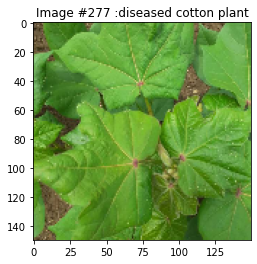

In [53]:
index = np.random.randint(0,1951)
plt.figure()
plt.imshow(train_images[index])
plt.title('Image #{} :'.format(index) + class_names[train_labels[index]])
plt.show()

In [54]:
import keras
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten

In [55]:
model = keras.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(4,activation='softmax'))


In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_9 (Dense)              (None, 84)               

In [57]:
## Here param tells the number of values updated in that layer. 
# Similar to how wghts get updated in ANN, here filter values will get updated.
# The first COnv2d layer has 32 filters of size 3*3*3. So the total updation swill be 27*32+(32) = 896. The last 32 is bias for each filter. 
# Pooling filter will not have any values in it so the param count here is zero. The output from this layer will be 74*74*32 
# Next Conv 2D layer gets, 74*74*32 as input. The no of filters for this layer is 32, 3*3*32. So the updatins are
3*3*32*32 + 32

9248

In [58]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [59]:
history = model.fit(train_images,train_labels,batch_size = 128, epochs=5,validation_split=0.15)

Epoch 1/5
13/13 [==============================] - 109s 7s/step - loss: 2.0413 - accuracy: 0.3044 - val_loss: 1.2724 - val_accuracy: 0.4334
Epoch 2/5
13/13 [==============================] - 64s 5s/step - loss: 1.2093 - accuracy: 0.4386 - val_loss: 0.9971 - val_accuracy: 0.5870
Epoch 3/5
13/13 [==============================] - 80s 6s/step - loss: 0.9770 - accuracy: 0.5845 - val_loss: 0.9139 - val_accuracy: 0.6485
Epoch 4/5
13/13 [==============================] - 147s 11s/step - loss: 0.8529 - accuracy: 0.6596 - val_loss: 0.7311 - val_accuracy: 0.7372 - loss: 0.8693 - accuracy: - ETA: 9s - loss: 0.8578 - accuracy: 0.6
Epoch 5/5
13/13 [==============================] - 46s 3s/step - loss: 0.7257 - accuracy: 0.7094 - val_loss: 0.6989 - val_accuracy: 0.7509


In [69]:
#for layers in model.layers:
#    print(layers.get_weights())


In [70]:
## evaluate the model

accuracy = model.evaluate(test_images,test_labels)
accuracy

4/4 [==============================] - 1s 285ms/step - loss: 0.8941 - accuracy: 0.66040s - loss: 0.8941 - accuracy: 0.66


[0.8941341638565063, 0.6603773832321167]

In [72]:
# Increase the number of layers, neurons or epochs to get better accuarcy

# predict

pred = model.predict(test_images)
pred ## for each image this will have 4 probabilites as we have used softmax as the function. We will be take the max of each image

array([[6.45555735e-01, 2.54563361e-01, 7.99594745e-02, 1.99214537e-02],
       [4.81158458e-02, 6.17268622e-01, 2.36295462e-02, 3.10985953e-01],
       [4.98211235e-01, 1.81892186e-01, 1.52514398e-01, 1.67382151e-01],
       [9.07270074e-01, 7.71895200e-02, 9.79556795e-03, 5.74484561e-03],
       [2.16703355e-01, 6.49896026e-01, 2.35642539e-03, 1.31044090e-01],
       [6.73906565e-01, 2.27276579e-01, 8.44966099e-02, 1.43201994e-02],
       [6.29175484e-01, 3.22722733e-01, 3.16895284e-02, 1.64122041e-02],
       [3.21492016e-01, 4.65157062e-01, 4.30583991e-02, 1.70292571e-01],
       [9.52007592e-01, 2.76673157e-02, 1.32911969e-02, 7.03395018e-03],
       [2.14883000e-01, 8.55661780e-02, 6.12527952e-02, 6.38297975e-01],
       [9.01412606e-01, 5.83456010e-02, 3.28437388e-02, 7.39809871e-03],
       [6.37397468e-01, 1.47348270e-01, 1.93994552e-01, 2.12598015e-02],
       [5.32823026e-01, 1.94656894e-01, 2.62169093e-01, 1.03510609e-02],
       [4.82351221e-02, 8.42702866e-01, 2.45602336e

In [74]:
np.argmax(pred,axis = 1) # taking argmax xoz we want the label of highest prob in each image

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1, 3, 2, 3, 2, 3, 2,
       0, 0, 1, 1, 3, 3, 2, 2, 0, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [83]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [75]:
labels = np.argmax(pred,axis = 1)

In [79]:
from sklearn.metrics import accuracy_score

accuracy_score(labels,test_labels)

0.660377358490566

In [80]:
## prediction of image one

labels[1]

1

In [93]:
test_images[1]


array([[[0.30588236, 0.36078432, 0.16862746],
        [0.28627452, 0.41960785, 0.16862746],
        [0.4       , 0.5411765 , 0.24313726],
        ...,
        [0.7882353 , 0.95686275, 0.54509807],
        [0.81960785, 0.972549  , 0.61960787],
        [0.78431374, 0.9411765 , 0.6039216 ]],

       [[0.42745098, 0.43137255, 0.21176471],
        [0.42745098, 0.48235294, 0.22745098],
        [0.42352942, 0.5254902 , 0.22352941],
        ...,
        [0.78039217, 0.95686275, 0.58431375],
        [0.78431374, 0.9529412 , 0.58431375],
        [0.78039217, 0.9490196 , 0.6392157 ]],

       [[0.43529412, 0.4       , 0.18431373],
        [0.45490196, 0.44705883, 0.20784314],
        [0.43137255, 0.47058824, 0.19215687],
        ...,
        [0.7921569 , 0.9607843 , 0.6392157 ],
        [0.79607844, 0.9607843 , 0.6392157 ],
        [0.76862746, 0.9411765 , 0.60784316]],

       ...,

       [[0.28235295, 0.68235296, 0.03529412],
        [0.24313726, 0.6509804 , 0.08235294],
        [0.2784314 , 0

Text(0.5, 1.0, 'diseased cotton leaf')

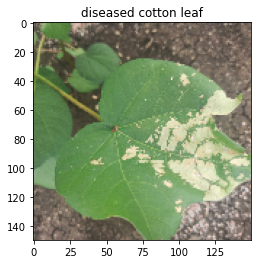

In [98]:
# Actual 
plt.figure()
plt.imshow(test_images[0])
plt.title(class_names[test_labels[0]])

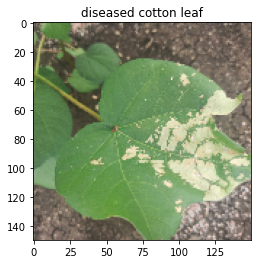

In [99]:
# predicted
plt.figure()
plt.imshow(test_images[0])
plt.title(class_names[labels[0]])
plt.show()

Text(0.5, 1.0, 'diseased cotton leaf')

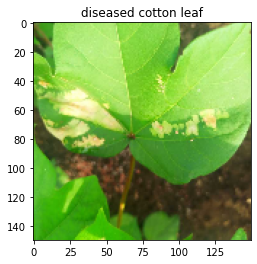

In [96]:
# Actual 
plt.figure()
plt.imshow(test_images[1])
plt.title(class_names[test_labels[1]])

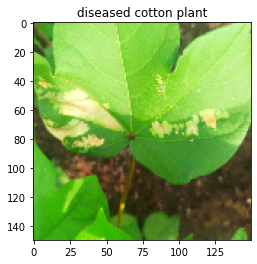

In [97]:
# predicted
plt.figure()
plt.imshow(test_images[1])
plt.title(class_names[labels[1]])
plt.show()